In [68]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pathlib import Path
import os
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import config variables
from src.config import dir_prep, dir_plots_group_cmpr, cfg_colors
from src.utl import remove_outliers_df


In [43]:
# find all relevant files
f_list = os.listdir(dir_prep)
str_match = ".csv"
fnms = [s for s in f_list if str_match in s]

In [44]:
# load data and merge pupil and fsr data
dat_pupil = pd.read_csv(Path.joinpath(dir_prep,"all_trials_pupil.csv"), index_col=False)
dat_fsr = pd.read_csv(Path.joinpath(dir_prep,"all_trials_fsr.csv"), index_col=False)

full = pd.merge(dat_fsr, dat_pupil, on=["ID","Trial n","Group","Feedback type","Feedback angle"])


In [45]:
# clean out bad epochs from pupil data
tt_pupil = full.copy()
cfg_out_ppl_per = 30

tt_pupil = tt_pupil.loc[tt_pupil["Percentage bad pupil samples"] < cfg_out_ppl_per,:]

### evaluate differences epr participant for each condition interaction

In [46]:
cfg_out_ppl_per = 25
diff_data = full.copy()

diff_data = diff_data.loc[diff_data["Percentage bad pupil samples"] < cfg_out_ppl_per,:]
diff_data = diff_data[['ID','Group', 'Feedback type', 'Feedback angle','Power [4-12]','Pupil size']]

In [47]:
diffs = diff_data.pivot_table(index=['ID','Group','Feedback type'],columns='Feedback angle',values=['Power [4-12]','Pupil size'],margins=False,aggfunc='mean').reset_index()
diffs['dPower'] = diffs['Power [4-12]']['high']-diffs['Power [4-12]']['low']
diffs['dPpl'] = diffs['Pupil size']['high']-diffs['Pupil size']['low']
diffs = remove_outliers_df(diffs,['dPower'],1)
diffs['dPower'] = abs(diffs['dPower'])

Working on column: dPower


In [48]:
df_vo = len(diffs['Feedback type'] == 'vo')
df_va = len(diffs['Feedback type'] == 'va')
df_ao = len(diffs['Feedback type'] == 'ao')

t_pow_vo, p_pow_vo = stats.mannwhitneyu(diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'c')])
print(f'Differences for group deltas in visual only for tremor is t[{df_vo}]={t_pow_vo:.2f}, p:{p_pow_vo:.3f}')
t_pow_av, p_pow_av = stats.mannwhitneyu(diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv-visual for tremor is t[{df_va}]={t_pow_av:.2f}, p:{p_pow_av:.3f}')
t_pow_ao, p_pow_ao = stats.mannwhitneyu(diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv only for tremor is t[{df_ao}]={t_pow_ao:.2f}, p:{p_pow_ao:.3f}')



Differences for group deltas in visual only for tremor is t[52]=38.00, p:0.103
Differences for group deltas in auditiv-visual for tremor is t[52]=56.00, p:0.056
Differences for group deltas in auditiv only for tremor is t[52]=39.00, p:0.163


In [49]:
t_ppl_vo, p_ppl_vo = stats.mannwhitneyu(diffs['dPpl'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'vo', diffs['Group'] == 'c')])
print(f'Differences for group deltas in visual only for pupil size is t[{df_vo}]={t_ppl_vo:.2f}, p:{p_ppl_vo:.3f}')
t_ppl_av, p_ppl_av = stats.mannwhitneyu(diffs['dPpl'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'va', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv-visual for pupil size is t[{df_va}]={t_ppl_av:.2f}, p:{p_ppl_av:.3f}')
t_ppl_ao, p_ppl_ao = stats.mannwhitneyu(diffs['dPpl'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'p')],diffs['dPower'][np.logical_and(diffs['Feedback type'] == 'ao', diffs['Group'] == 'c')])
print(f'Differences for group deltas in auditiv only for pupil size is t[{df_ao}]={t_ppl_ao:.2f}, p:{p_ppl_ao:.3f}')


Differences for group deltas in visual only for pupil size is t[52]=20.00, p:0.684
Differences for group deltas in auditiv-visual for pupil size is t[52]=nan, p:nan
Differences for group deltas in auditiv only for pupil size is t[52]=24.00, p:0.871


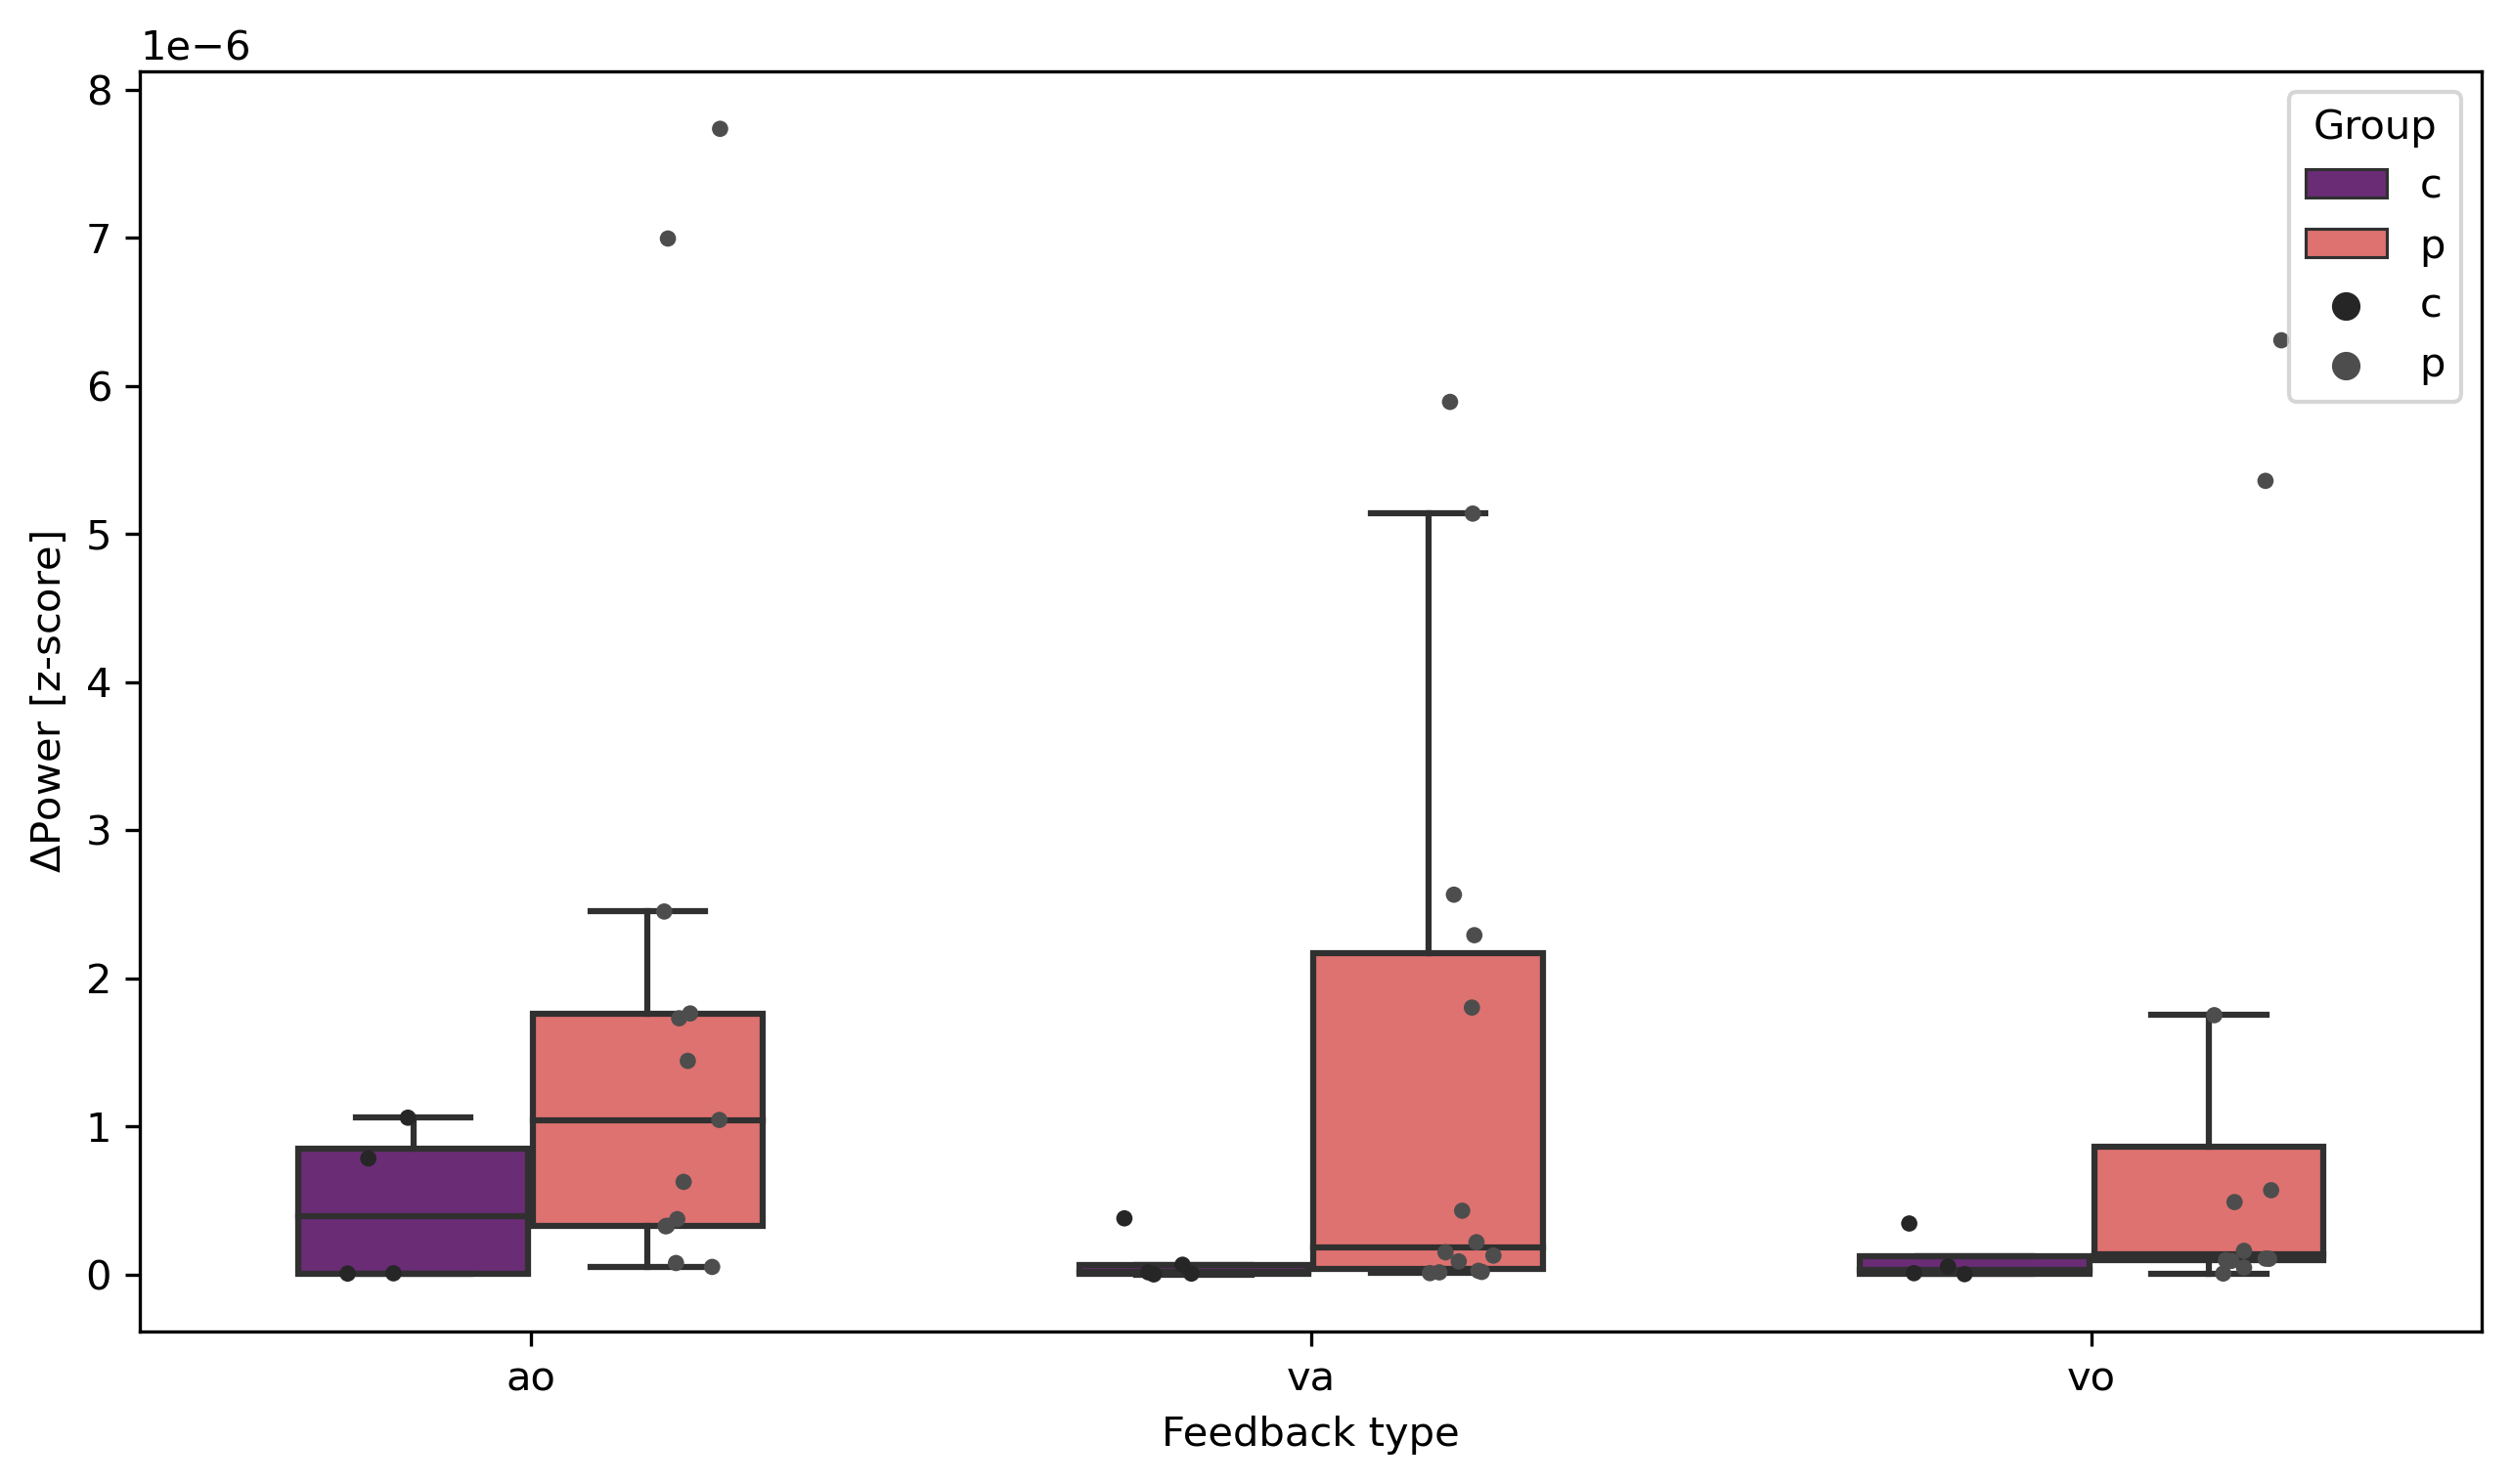

In [75]:
fig, axs = plt.subplots(1, 1, figsize=(8.5, 5), dpi = 300)
sns.boxplot(data = diffs, x = 'Feedback type', y = 'dPower', hue='Group', width=.6,palette=cfg_colors["group_colors"],fliersize=0)
sns.stripplot(data = diffs, x = 'Feedback type', y = 'dPower', hue='Group',size=4, color=".3", linewidth=0,dodge=True)
axs.set_ylabel(r"$\Delta$Power [z-score]")
fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
fig.savefig(Path.joinpath(dir_plots_group_cmpr, f"group_cmpr_dpower.png"))

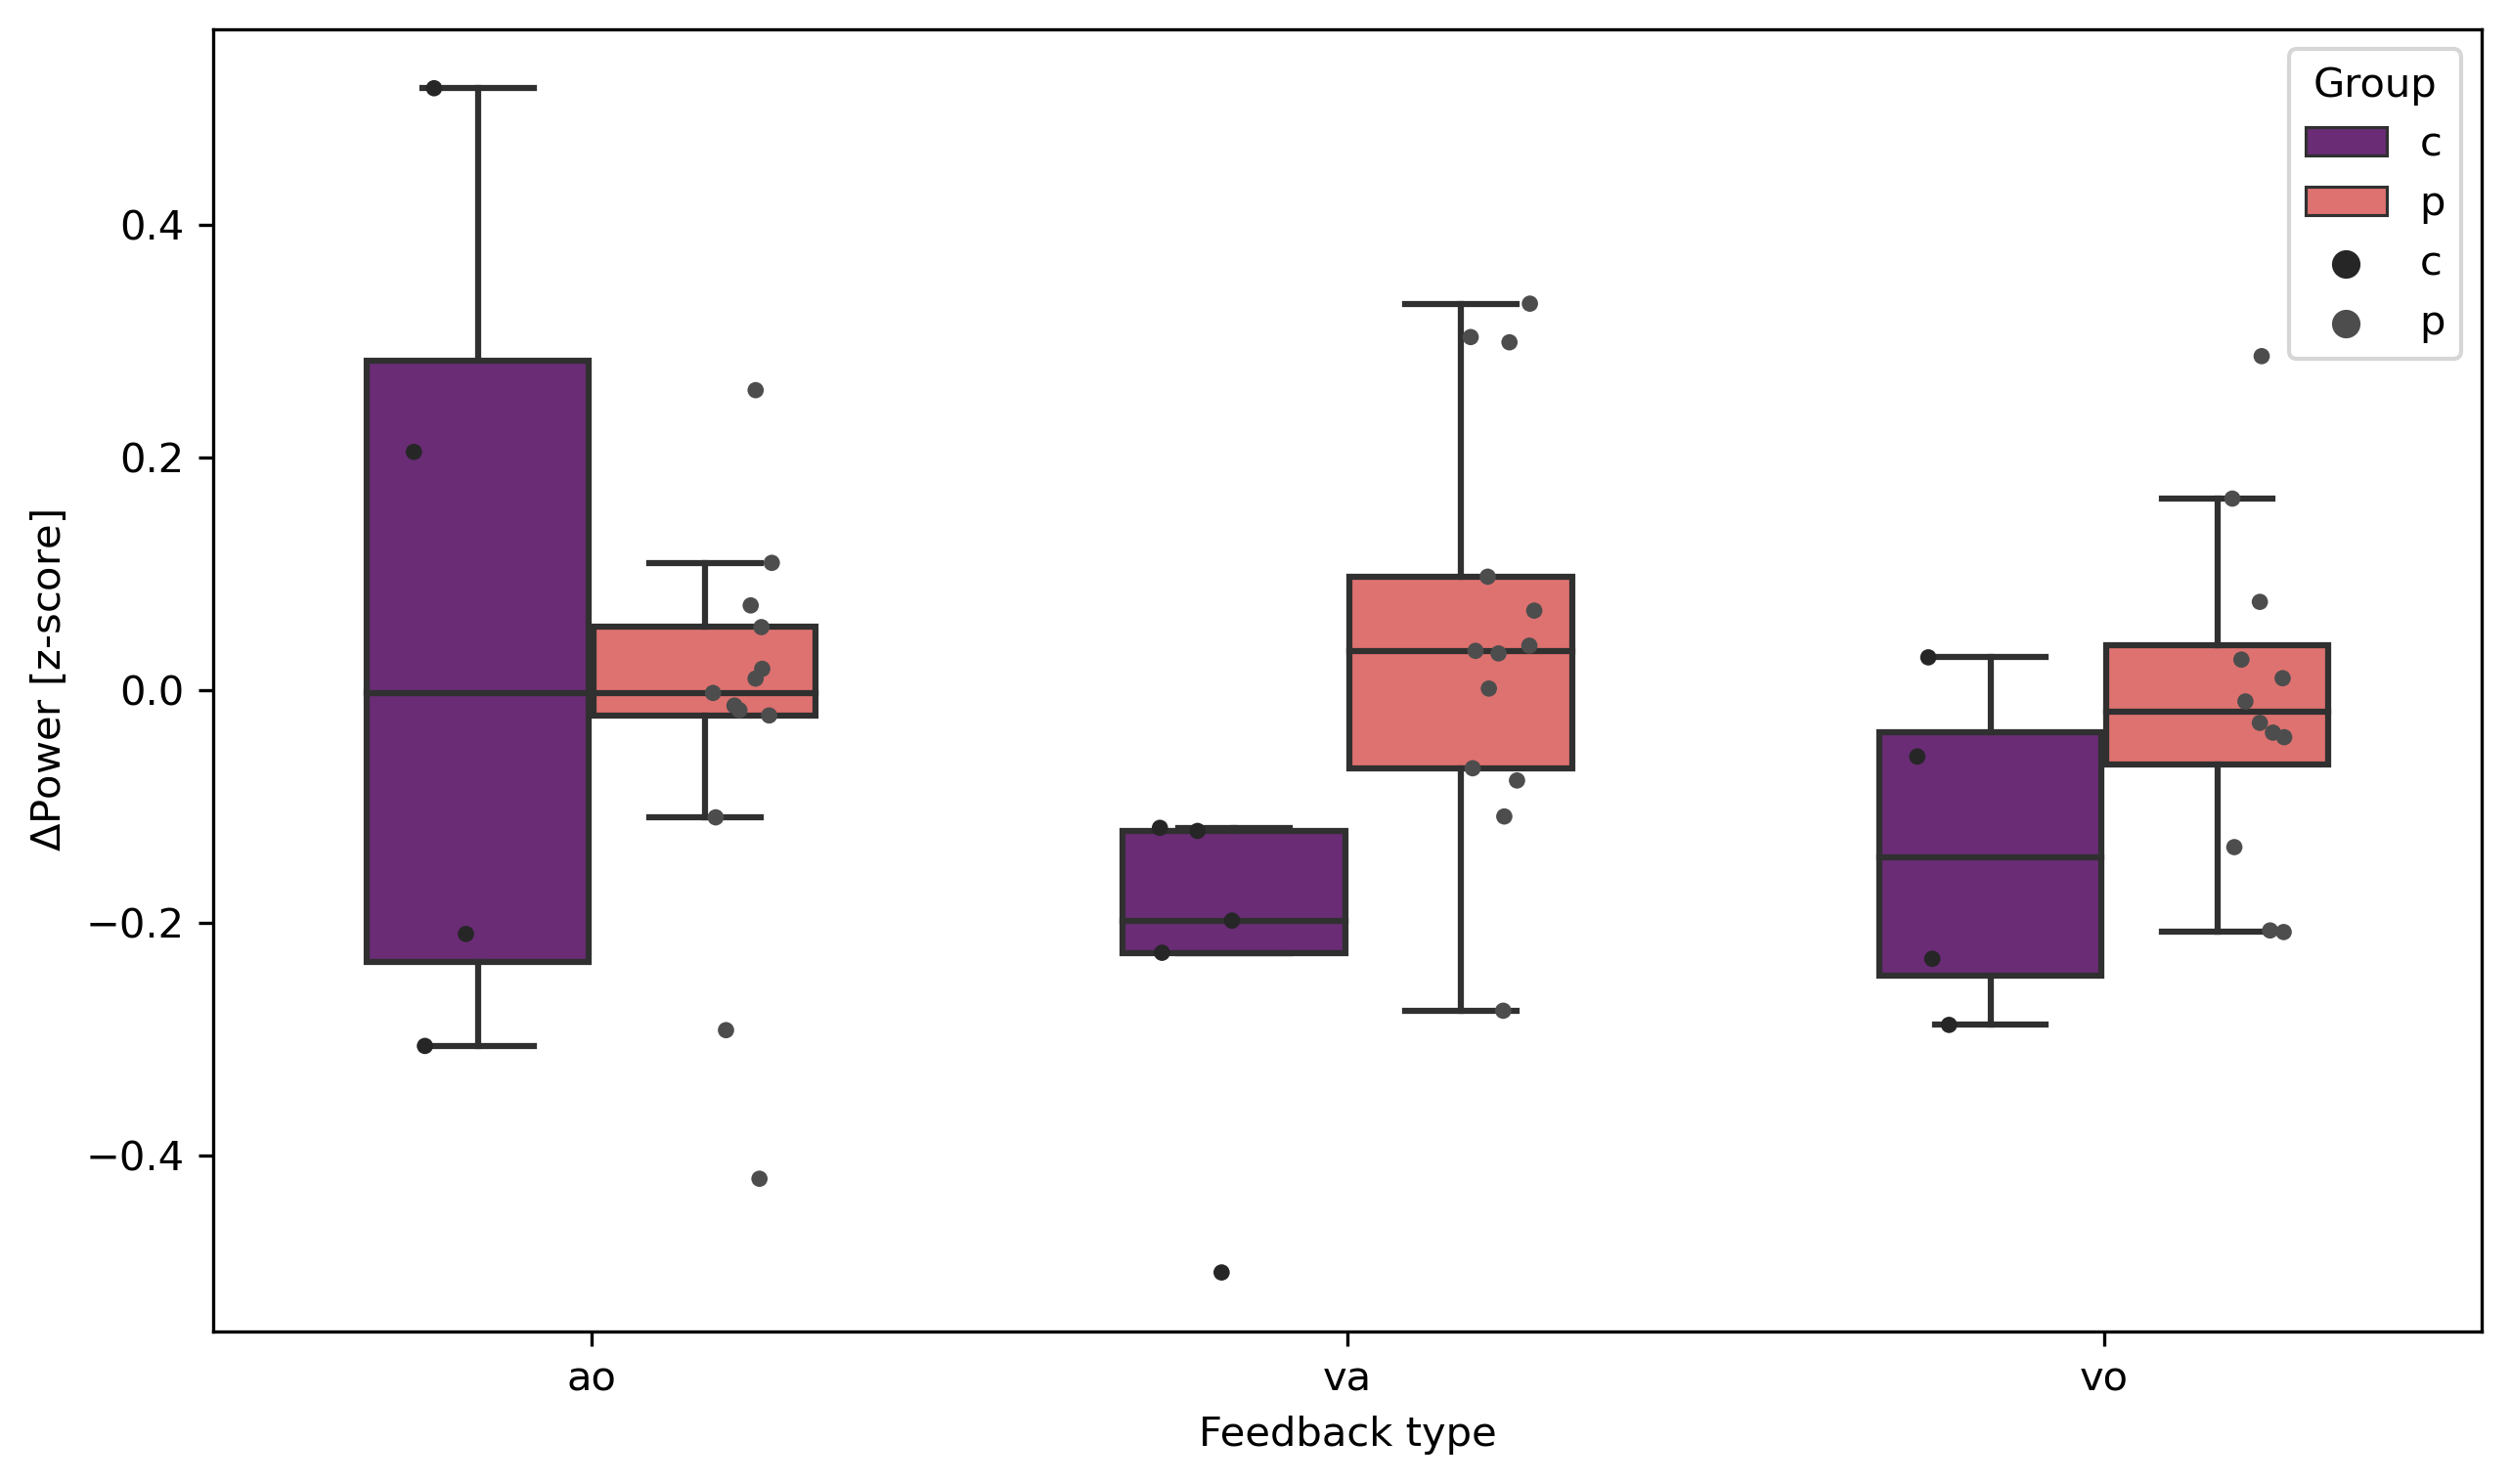

In [74]:
fig, axs = plt.subplots(1, 1, figsize=(8.5, 5), dpi = 300)
sns.boxplot(data = diffs, x = 'Feedback type', y = 'dPpl', hue='Group', width=.6,palette=cfg_colors["group_colors"],fliersize=0)
sns.stripplot(data = diffs, x = 'Feedback type', y = 'dPpl', hue='Group',size=4, color=".3", linewidth=0,dodge=True)
axs.set_ylabel(r"$\Delta$Power [z-score]")
fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
fig.savefig(Path.joinpath(dir_plots_group_cmpr, f"group_cmpr_dppl.png"))